Import necessary functions and libraries.

In [47]:
import numpy as np, cmath, scipy as sp
import scipy.io
from matplotlib import pyplot as plt

#import basic functions from numpy that we'll need
from numpy import pi, sin, cos, exp, sqrt, log, log10, random, angle, real, imag  , ceil, floor, absolute
from numpy.fft import fft, ifft
from scipy import signal as sig
from scipy.signal import hilbert

%matplotlib inline

Import optional seaborn library for prettier plots.

In [2]:
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

###Figure 14.1

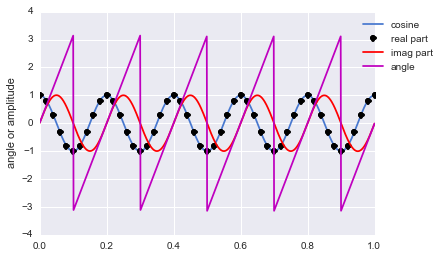

In [39]:
#create cosine
time = np.arange(0,1+0.001,0.001)
cosine = cos(2*pi*5*time)

#plot the signal, and the real & imaginary part of its hilbert transform, and the angle of the analytic signal
plt.plot(time,cosine)
plt.plot(time[::20],real(hilbert(cosine[::20])),'ko') #plot every 20th point bc of overlap
plt.plot(time,imag(hilbert(cosine)),'r')
plt.plot(time,angle(hilbert(cosine)),'m')

plt.ylabel("angle or amplitude")
_=plt.legend(['cosine','real part','imag part','angle'],bbox_to_anchor=[1.2,1])

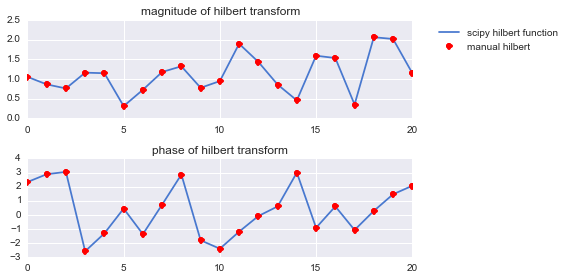

In [54]:
#The FFT-based hilbert transform

#generate random numbers
n = 21
randomnumbers = random.randn(21)

#take FFT
f = fft(randomnumbers)

#create copy that is multiplied by complex operator
complexf = 1j*f

#find indices of positive and negatice frequencies
posF = np.arange(1,floor(n/2.) + (n%2)).astype(int)
negF = np.arange(ceil(n/2.) + (~n%2),n).astype(int)

#rotate Fourier coefficients
#note1: this works by computing iAsin(2pft) component, i.e. phase quadrature
#note 2: positive frequencies are rotated counter clockwise, negative frequencies are rotated clockwise

f[posF] = f[posF] + -1j*complexf[posF]
f[negF] = f[negF] +  1j*complexf[negF]

#next two lines are alternative and slightly faster method
#book explains why this is equivalent
# f[posF] = f[posF] * 2
# f[negF] = f[negF] * 0

#take inverse FFT
hilbertx = ifft(f)

#compare with scipy's hilbert function
hilbertm = hilbert(randomnumbers)

#plot results

plt.subplot(211)
plt.plot(absolute(hilbertm))
plt.plot(absolute(hilbertx),'ro')
plt.legend(["scipy hilbert function","manual hilbert"],bbox_to_anchor = [1.4,1])
plt.title("magnitude of hilbert transform")

plt.subplot(212)
plt.plot(angle(hilbertm))
plt.plot(angle(hilbertx),'ro')
plt.title("phase of hilbert transform")

plt.tight_layout()